# WEEK -1 DATA SCIENCE

# Dataset Loading and Pre-processing

# 1. Importing Necessary Library

In [1]:
import pandas as pd

# 2. Loading Dataset

In [2]:
df = pd.read_csv(r"C:\Users\Tahawur\Desktop\Developers Hub Internship\Week-1\Titanic-Dataset.csv")

print(df)
# to see the nature of dataset 

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

# Dataset Overview

**PassengerId**: A unique identifier for each passenger.

**Pclass**: Passenger's class (1 = 1st, 2 = 2nd, 3 = 3rd).

**Name**: Name of the passenger.

**Sex**: Gender of the passenger (male or female).

**Age**: Age of the passenger in years.

**SibSp**: Number of siblings or spouses the passenger was traveling with.

**Parch**: Number of parents or children the passenger was traveling with.

**Ticket**: Ticket number.

**Fare**: The fare paid by the passenger for the ticket.

**Cabin**: Cabin number.

**Embarked**: Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton).

**Survived**: The target variable (0 = did not survive, 1 = survived).

Dataset contains **891 rows** and **12 columns**.

In [3]:
# to see first few rows of the dataset

print(df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


# 3. Data Pre-processing Operations

# 3.1 Handle Missing Values

In [5]:
# Checking missing values

missing_values = df.isnull().sum()
print("Missing Values:")
print(missing_values)

Missing Values:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [6]:
# Handling missing 'Age' values by filling with the median
df['Age'].fillna(df['Age'].mean(), inplace=True)

# Handling missing 'Cabin' values by filling them with unknown values in the column
df['Cabin'].fillna('Unknown', inplace=True)

# Handling missing 'Embarked' values by filling with the mode
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Check if there are still any missing values
print(df.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


# So, now  dataset doesn't contain any null value in any of it's column 

# 3.2 Convert Categorical Data To Numerical Format

In [7]:
# importing one hot encoder from sklearn 
from sklearn.preprocessing import OneHotEncoder

# Initialize OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)

# Fitting and transforming the data for the selected columns
encoded_values = encoder.fit_transform(df[['Sex', 'Embarked']])

print(encoded_values)

[[0. 1. 0. 0. 1.]
 [1. 0. 1. 0. 0.]
 [1. 0. 0. 0. 1.]
 ...
 [1. 0. 0. 0. 1.]
 [0. 1. 1. 0. 0.]
 [0. 1. 0. 1. 0.]]


In [8]:
# Converting encoded values to DataFrame for better readability

encoded_df = pd.DataFrame(encoded_values, columns=encoder.get_feature_names_out(['Sex', 'Embarked']))

print(encoded_df)

     Sex_female  Sex_male  Embarked_C  Embarked_Q  Embarked_S
0           0.0       1.0         0.0         0.0         1.0
1           1.0       0.0         1.0         0.0         0.0
2           1.0       0.0         0.0         0.0         1.0
3           1.0       0.0         0.0         0.0         1.0
4           0.0       1.0         0.0         0.0         1.0
..          ...       ...         ...         ...         ...
886         0.0       1.0         0.0         0.0         1.0
887         1.0       0.0         0.0         0.0         1.0
888         1.0       0.0         0.0         0.0         1.0
889         0.0       1.0         1.0         0.0         0.0
890         0.0       1.0         0.0         1.0         0.0

[891 rows x 5 columns]


# 3.3 Normalize or Scale Numerical Data

In [9]:
# importing standard scaler from skleran 
from sklearn.preprocessing import StandardScaler


# Standardizing numerical columns

scaler = StandardScaler()

columns_to_standardize = ['Age', 'Fare']

df[columns_to_standardize] = scaler.fit_transform(df[columns_to_standardize])

print(df[columns_to_standardize])

          Age      Fare
0   -0.592481 -0.502445
1    0.638789  0.786845
2   -0.284663 -0.488854
3    0.407926  0.420730
4    0.407926 -0.486337
..        ...       ...
886 -0.207709 -0.386671
887 -0.823344 -0.044381
888  0.000000 -0.176263
889 -0.284663 -0.044381
890  0.177063 -0.492378

[891 rows x 2 columns]


# 3.4 Check for Duplicate Rows

In [10]:
# Check for duplicate rows
print(df.duplicated().sum())

0


# 4. Basic Exploratory Data Analysis (EDA)

# 4.1 Summary Statistics

In [11]:
print(df.describe())

       PassengerId    Survived      Pclass           Age       SibSp  \
count   891.000000  891.000000  891.000000  8.910000e+02  891.000000   
mean    446.000000    0.383838    2.308642  2.232906e-16    0.523008   
std     257.353842    0.486592    0.836071  1.000562e+00    1.102743   
min       1.000000    0.000000    1.000000 -2.253155e+00    0.000000   
25%     223.500000    0.000000    2.000000 -5.924806e-01    0.000000   
50%     446.000000    0.000000    3.000000  0.000000e+00    0.000000   
75%     668.500000    1.000000    3.000000  4.079260e-01    1.000000   
max     891.000000    1.000000    3.000000  3.870872e+00    8.000000   

            Parch          Fare  
count  891.000000  8.910000e+02  
mean     0.381594  3.987333e-18  
std      0.806057  1.000562e+00  
min      0.000000 -6.484217e-01  
25%      0.000000 -4.891482e-01  
50%      0.000000 -3.573909e-01  
75%      0.000000 -2.424635e-02  
max      6.000000  9.667167e+00  


# 4.2 Visualizing Data

In [12]:
# importing matplotlib and seaborn libraries for visualization 
import matplotlib.pyplot as plt
import seaborn as sns

# Set Seaborn style
sns.set(style="whitegrid")


# Overall Survival Rate

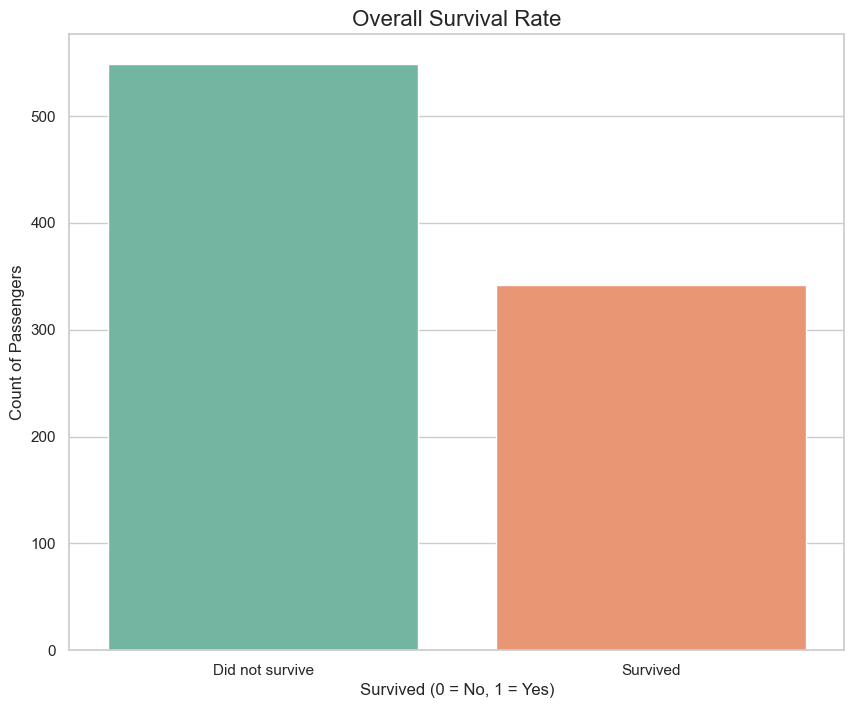

In [13]:
# Overall survival rate
plt.figure(figsize=(10, 8))
sns.countplot(x='Survived', data=df, palette='Set2')
plt.title('Overall Survival Rate', fontsize=16)
plt.xlabel('Survived (0 = No, 1 = Yes)', fontsize=12)
plt.ylabel('Count of Passengers', fontsize=12)
plt.xticks([0, 1], ['Did not survive', 'Survived'])
plt.show()

# Converting 'Survived' column  into 'Categorical' column for following visualizations 

Converting **Survived** column ,which is binary, into a **Categorical** column because **seaborn** creates error if not handled with **Categorical** columns   

In [14]:
 
df['Survived'] = df['Survived'].map({0: 'Did not survive', 1: 'Survived'})
print(df['Survived'])

0      Did not survive
1             Survived
2             Survived
3             Survived
4      Did not survive
            ...       
886    Did not survive
887           Survived
888    Did not survive
889           Survived
890    Did not survive
Name: Survived, Length: 891, dtype: object


#  Survival Rate by Class:

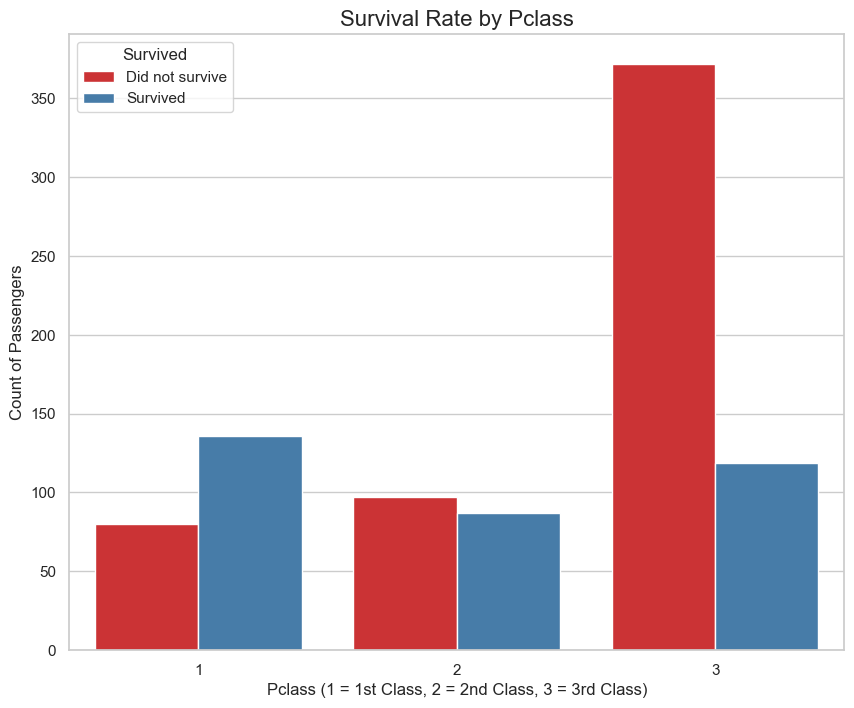

In [23]:
# Survival rate by Pclass
plt.figure(figsize=(10, 8))
sns.countplot(x='Pclass', hue='Survived', data=df, palette='Set1')
plt.title('Survival Rate by Pclass', fontsize=16)
plt.xlabel('Pclass (1 = 1st Class, 2 = 2nd Class, 3 = 3rd Class)', fontsize=12)
plt.ylabel('Count of Passengers', fontsize=12)
plt.legend(title='Survived', labels=['Did not survive', 'Survived'])
plt.show()


# Survival Rate by Sex:

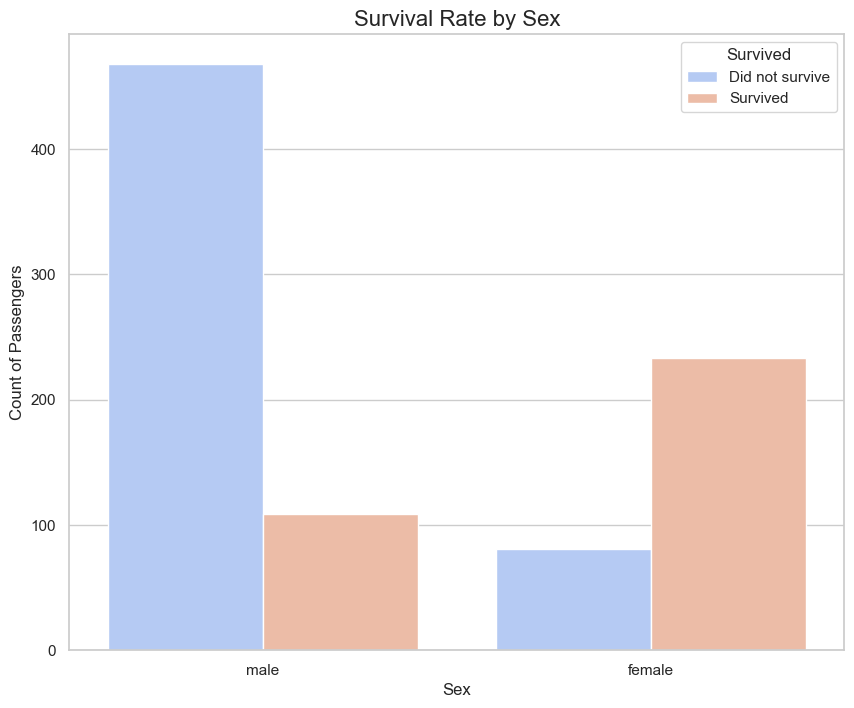

In [26]:
# Survival rate by Sex
plt.figure(figsize=(10, 8))
sns.countplot(x='Sex', hue='Survived', data=df, palette='coolwarm')
plt.title('Survival Rate by Sex', fontsize=16)
plt.xlabel('Sex', fontsize=12)
plt.ylabel('Count of Passengers', fontsize=12)
plt.legend(title='Survived', labels=['Did not survive', 'Survived'])
plt.show()

# Survival Rate by Embarked (Port of Embarkation):

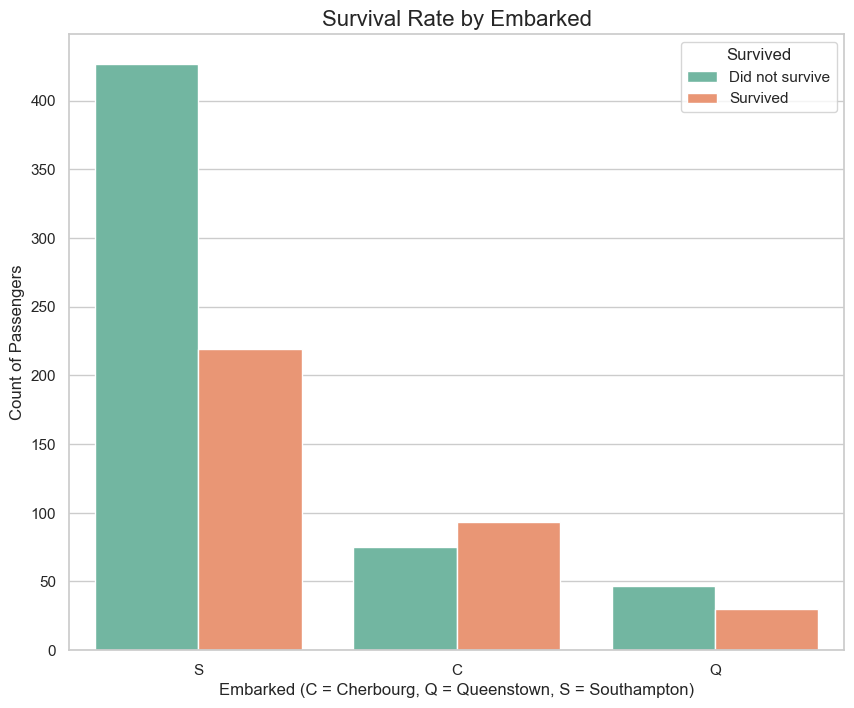

In [20]:
# Survival rate by Embarked
plt.figure(figsize=(10, 8))
sns.countplot(x='Embarked', hue='Survived', data=df, palette='Set2')
plt.title('Survival Rate by Embarked', fontsize=16)
plt.xlabel('Embarked (C = Cherbourg, Q = Queenstown, S = Southampton)', fontsize=12)
plt.ylabel('Count of Passengers', fontsize=12)
plt.legend(title='Survived', labels=['Did not survive', 'Survived'])
plt.show()

# Survival Rate by SibSp (Siblings/Spouses) and Parch (Parents/Children):

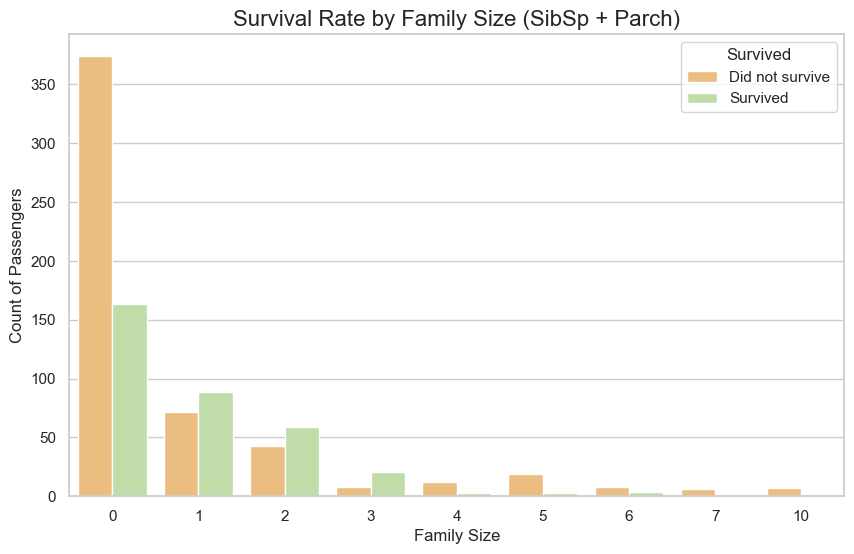

In [21]:
# Create a new column for family size (SibSp + Parch)
df['Family_Size'] = df['SibSp'] + df['Parch']

# Survival rate by Family Size
plt.figure(figsize=(10, 6))
sns.countplot(x='Family_Size', hue='Survived', data=df, palette='Spectral')
plt.title('Survival Rate by Family Size (SibSp + Parch)', fontsize=16)
plt.xlabel('Family Size', fontsize=12)
plt.ylabel('Count of Passengers', fontsize=12)
plt.legend(title='Survived', labels=['Did not survive', 'Survived'])
plt.show()

# Dataset 

I choose this dataset from kaggle , its size is 60 kb and it contains various features. 

**Reason**: It contains some features that will help me to practice some pre-processing techniques including one hot encoder or label encoder and standard scaler 

# Pre-processing Techniques

**Pre-processing techniques** include **one hot encoder** (to convert categorical value into binary) and **standard scaler** (to make values lie on a same scale). This techniques are usually used to prepre data for machine learning models, so do I.

I also handled **missing values** that were present in **Age**, **Cabin**, and **Embarked** columns by taking **mean**, **unknown values** and **mode** respectively.  

# Challenges

There was a difficulty during visualization because seaborn don't handle binary values in some cases. For that i converted **Survived** column, which was binary, into a categorical column, so that we can visualize data in a better way

# Key Insights


**Survival Rate**: Approximately **38.38%** of passengers managed to **survived** in Titanic disaster.

**Gender Survival**: Out of survived passengers, **Women** survival rate was around **74%** & **Male** was **18**.

**Class and Survival**: Passengers in **1st class** had the **highest survival rate**, **followed by 3rd class**,  while **2nd class** passengers had the **lowest survival rate** . This suggests that class played a critical role in survival chances.

**Age and Survival**: Children had a higher survival rate than adults, reflecting the **"women and children first" policy** during the evacuation.

**Embarked Port**: Passengers boarding from **Quenstown (Q)** had the lowest survival rate, while those from **Southampton (S)** had the highest.

**Family Size**: Passengers **traveling with family** (those with higher SibSp or Parch values) had a **lower chance of survival**, as they were more likely to be evacuated together and disaster didn't gave a lot of time to survive.

# Summary

The **Titanic dataset** contains information about passengers on the Titanic,
including columns like age, gender, class, and survival status to name few.
**Key insights** reveal that **survival rates** were **higher for women, children, and 1st class passengers**.
The **overall survival rate** was **38%**, with women having a significantly better chance of survival. 
**Missing data** in columns like **Age** and **Cabin** were notable, 
while **features** such as **Fare and Embarked** provided additional context for survival predictions